In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import re
import seaborn as sns

In [5]:
# # #read survey data and set variable if CSV file
df = pd.read_csv('Office of Information  Technology 2024 AES.csv')

#preview data
df.head()

,Comment,Self-Identified Type
0,"This survey is advertised as being anonymous, ...",Improvement area
1,For supervisors to allow employees to attend t...,Improvement area
2,Suggest we use performance measurement baselin...,Improvement area
3,Richmond OIT is a complete disaster. Leadershi...,Improvement area
4,Improvement of collaboration between support t...,Improvement area


In [6]:
print(df.head())

                                             Comment Self-Identified Type
0  This survey is advertised as being anonymous, ...     Improvement area
1  For supervisors to allow employees to attend t...     Improvement area
2  Suggest we use performance measurement baselin...     Improvement area
3  Richmond OIT is a complete disaster. Leadershi...     Improvement area
4  Improvement of collaboration between support t...     Improvement area


In [9]:
#counting the rows to see what we are starting with
wor_count = len(df)
print(f'Total row count at start is: {wor_count}')

Total row count at start is: 1047


In [10]:
#begin stem sorting house
from collections import defaultdict
import re

# stem lists for each category
accountability = ['respons', 'ownership', 'self-account', 'leadership', 'decision-mak', 'integr', 'transpar', 'self-disciplin', 'commit', 'answer', 'perform', 'expect', 'standard', 'evalu', 'feedback', 'consequ', 'improv', 'compli', 'monitor', 'supervis', 'teamwork', 'collabor', 'mutual account', 'peer review', 'support', 'trust', 'commun', 'shared goal', 'cooper']
career_advancement = ['advanc', 'promot', 'opportun', 'growth', 'career ladder', 'recognit', 'merit', 'progress', 'rais', 'promotion criteria', 'train', 'cours', 'certif', 'professional develop', 'cross-train', 'workshop', 'skill-build', 'learn', 'educ', 'development program', 'career path', 'development track', 'roadmap', 'progress plan', 'career goal', 'mentor', 'guid', 'career plan', 'succession plan', 'long-term goal']
communication = ['open', 'honest', 'clar', 'trust', 'disclos', 'candor', 'integr', 'straightforward', 'account', 'visibil', 'verbal', 'written', 'email', 'meet', 'team', 'chat', 'video call', 'present', 'report', 'announc', 'overcommun', 'undercommun', 'frequenc', 'volum', 'balanc', 'suffici', 'excess', 'inadequ', 'consist', 'information overload']
idea = ['divers', 'inclus', 'represent', 'equal opportun', 'diverse workforce', 'recruit', 'hiring practic', 'affirmative action', 'minor', 'underrepresent group', 'discrimin', 'bias', 'prejudic', 'harass', 'inequal', 'unfair treat', 'racism', 'sexism', 'exclus', 'microaggress']
employee_engagement = ['moral', 'engag', 'motiv', 'enthusi', 'job satisfact', 'commit', 'energi', 'positiv', 'disengag', 'burnout', 'leadership', 'support', 'guid', 'feedback', 'recognit', 'encourag', 'influenc', 'relationship', 'trust', 'manag', 'eecc', 'connection call', 'engagement call', 'employee check-in', 'commun', 'interact', 'feedback session', 'engagement meet', 'employee discuss', 'connection session', 'teamwork', 'collabor', 'cooper', 'camaraderi', 'trust', 'relationship-build', 'team bond', 'unit']
leadership = ['feedback', 'input', 'suggest', 'opinion', 'commun', 'ignor', 'overlook', 'unheard', 'dismiss', 'engag', 'ethic', 'integr', 'honest', 'fair', 'transpar', 'account', 'corrupt', 'misconduct', 'unethic', 'trustworthi', 'direct', 'guid', 'strategi', 'vision', 'priorit', 'goal', 'leadership', 'plan', 'discontent', 'misalign', 'servant leadership', 'empat', 'support', 'priorit', 'selfless', 'employee-focus', 'care', 'nurtur', 'empower', 'advocaci', 'trust', 'confid', 'reliabl', 'depend', 'credibil', 'faith', 'assur', 'loyalti', 'respect', 'belief']
meaningful_change = ['repeat', 'unchang', 'stagnant', 'ignor', 'overlook', 'unaddress', 'unresolv', 'inaction', 'frustrat', 'disregard', 'futil', 'pointless', 'hopeless', 'ineffect', 'dishearten', 'discourag', 'unheard', 'neglect', 'waste of time', 'skeptic', 'privaci', 'confidenti', 'anonym', 'secur', 'trust', 'protect', 'sensit inform', 'data breach', 'concern', 'safeguard']
ode = ['ode', 'aes', 'ees', 'survey', 'feedback', 'assess', 'evalu', 'metric', 'data collect', 'organizational develop', 'eecc', 'connection call', 'engagement call', '6 essential question', 'performance consultant', 'pc work', 'workshop', 'train session', 'development program', 'employee engag']
performance_management = ['performance review', 'apprais', 'evalu', 'feedback', 'goal', 'object', 'achiev', 'improv', 'assess', 'develop', 'fair', 'impartial', 'unbias', 'equit', 'just', 'honest', 'transpar', 'object', 'balanc', 'accur']
position_management = ['position descript', 'job role', 'respons', 'duti', 'task', 'accur', 'represent', 'job analys', 'role clar', 'job specific', 'align', 'skillset', 'competenc', 'qualif', 'expertis', 'match', 'fit', 'workforce plan', 'role suit', 'talent manag']
process_improvement = ['workflow', 'effici', 'optim', 'streamlin', 'automat', 'tool integr', 'process enhanc', 'improv', 'product', 'simplif']
recognition = ['bonus', 'incent', 'reward', 'performance bonus', 'achiev', 'recognit', 'extra pay', 'financial reward', 'merit pay', 'gratific', 'qsi', 'quality step increas', 'step increas', 'pay rais', 'salary adjust', 'performance-based increas', 'promot', 'increm', 'compens', 'pay scale', 'salary', 'pay', 'compens', 'wage', 'earn', 'competit pay', 'industry standard', 'remuner', 'incom', 'financial compens']
resources = ['tool', 'applic', 'softwar', 'equip', 'resourc', 'technolog', 'instrument', 'util', 'devic', 'solut', 'access', 'permiss', 'administr right', 'system access', 'user privileg', 'author', 'secur clear', 'credential', 'access control', 'account manag']
staffing = ['staffing level', 'workforc', 'augment', 'headcount', 'personnel', 'team size', 'recruit', 'hir', 'expans', 'capac', 'workload', 'overburden', 'stress', 'burnout', 'overwork', 'task load', 'operational issu', 'capac', 'product', 'effici', 'hir', 'recruit', 'unethic', 'unfair', 'slow process', 'bias', 'discrimin', 'delay', 'ineffici', 'transpar', 'engag', 'motiv', 'commit', 'enthusi', 'job satisfact', 'involv', 'particip', 'dedic', 'moral', 'product']
succession_planning = ['success', 'successor', 'knowledge transfer', 'mentor', 'train', 'develop', 'continu', 'leadership pipelin', 'skill develop', 'prepar', 'coach', 'transit', 'future leader', 'talent manag', 'knowledge shar']
strategy = ['reorganiz', 'realign', 'structural chang', 'organizational chang', 'restructur', 'transit', 'adapt', 'uncertain', 'stabil', 'adjust', 'cloud strategi', 'cloud adopt', 'cloud migrat', 'cloud servic', 'cloud comput', 'scalabil', 'flexibil', 'innovat', 'cloud infrastructur', 'cloud solut', 'polici', 'compli', 'regul', 'guidelin', 'standard', 'procedur', 'adher', 'govern', 'protocol', 'rule']
technology = ['vista', 'vmware', 'system', 'softwar', 'applic', 'platform', 'technolog', 'it system', 'infrastructur', 'solut', 'connection issu', 'network problem', 'connect', 'downtim', 'latenc', 'access issu', 'system outag', 'technical difficulti', 'network failur', 'disrupt', 'cerner', 'ehr', 'electronic health record', 'health it', 'medical record', 'patient data', 'health inform', 'digital record', 'health system', 'clinical document', 'microsoft team', 'collabor tool', 'commun platform', 'video conferenc', 'chat', 'virtual meet', 'technical support', 'usability', 'integr', 'function']
telework = ['telework', 'remote work', 'work from home', 'flexibil', 'telecommut', 'virtual work', 'remote opportun', 'home offic', 'flexible schedul', 'remote option']
positive_comments = ['appreci', 'satisfact', 'enjoy', 'positive experienc', 'gratitud', 'motiv', 'encourag', 'fulfil', 'pride', 'happi', 'support', 'team spirit', 'thank you']

Check for stem presence and prepare as a count/total.

In [14]:
# Initialize a dictionary to store the counts for each category
category_counts = defaultdict(int)

# function to check if any stem is present in the comment
def check_stems(comment, stems):
    for stem in stems:
        if re.search(stem, comment, re.IGNORECASE):
            return True
    return False

# Iterate through each comment and check for category stems
for comment in df['Comment']:
    if check_stems(comment, accountability):
        category_counts['Accountability'] += 1
    if check_stems(comment, career_advancement):
        category_counts['Career Advancement'] += 1
    if check_stems(comment, communication):
        category_counts['Communication'] += 1
    if check_stems(comment, idea):
        category_counts['Inclusion, Diversity, Equity, and Accessibility (IDEA)'] += 1
    if check_stems(comment, employee_engagement):
        category_counts['Employee Engagement'] += 1
    if check_stems(comment, leadership):
        category_counts['Leadership'] += 1
    if check_stems(comment, meaningful_change):
        category_counts['Meaningful Change from Surveys'] += 1
    if check_stems(comment, ode):
        category_counts['Organization Development and Engagement (ODE)'] += 1
    if check_stems(comment, performance_management):
        category_counts['Performance Management'] += 1
    if check_stems(comment, position_management):
        category_counts['Position Management'] += 1
    if check_stems(comment, process_improvement):
        category_counts['Process Improvement'] += 1
    if check_stems(comment, recognition):
        category_counts['Recognition'] += 1
    if check_stems(comment, resources):
        category_counts['Resources'] += 1
    if check_stems(comment, staffing):
        category_counts['Staffing'] += 1
    if check_stems(comment, succession_planning):
        category_counts['Succession Planning'] += 1
    if check_stems(comment, strategy):
        category_counts['Strategy'] += 1
    if check_stems(comment, technology):
        category_counts['Technology'] += 1
    if check_stems(comment, telework):
        category_counts['Telework'] += 1
    if check_stems(comment, positive_comments):
        category_counts['Positive Comments'] += 1



In [15]:
sorted_category_counts = dict(sorted(category_counts.items(), key=lambda item: item[1]))

In [16]:
# Print the sorted dictionary
for category, count in sorted_category_counts.items():
    print(f"{category}: {count}")

Inclusion, Diversity, Equity, and Accessibility (IDEA): 59
Telework: 98
Meaningful Change from Surveys: 118
Resources: 140
Technology: 160
Position Management: 171
Recognition: 177
Succession Planning: 180
Strategy: 197
Process Improvement: 203
Positive Comments: 226
Career Advancement: 287
Organization Development and Engagement (ODE): 296
Staffing: 365
Communication: 379
Performance Management: 380
Employee Engagement: 628
Leadership: 633
Accountability: 697


In [ ]:
# Define a function to check if a stem is present in the comment (T/F versions)
def check_stems(comment, stems):
    for stem in stems:
        if re.search(stem, comment, re.IGNORECASE):
            return True
    return False

# Add a column for each category and insert "1" or "0"
df['Accountability'] = df['Comment'].apply(lambda x: 1 if check_stems(x, accountability) else 0)
df['Career Advancement'] = df['Comment'].apply(lambda x: 1 if check_stems(x, career_advancement) else 0)
df['Communication'] = df['Comment'].apply(lambda x: 1 if check_stems(x, communication) else 0)
df['Inclusion, Diversity, Equity, and Accessibility (IDEA)'] = df['Comment'].apply(lambda x: 1 if check_stems(x, idea) else 0)
df['Employee Engagement'] = df['Comment'].apply(lambda x: 1 if check_stems(x, employee_engagement) else 0)
df['Leadership'] = df['Comment'].apply(lambda x: 1 if check_stems(x, leadership) else 0)
df['Meaningful Change from Surveys'] = df['Comment'].apply(lambda x: 1 if check_stems(x, meaningful_change) else 0)
df['Organization Development and Engagement (ODE)'] = df['Comment'].apply(lambda x: 1 if check_stems(x, ode) else 0)
df['Performance Management'] = df['Comment'].apply(lambda x: 1 if check_stems(x, performance_management) else 0)
df['Position Management'] = df['Comment'].apply(lambda x: 1 if check_stems(x, position_management) else 0)
df['Process Improvement'] = df['Comment'].apply(lambda x: 1 if check_stems(x, process_improvement) else 0)
df['Recognition'] = df['Comment'].apply(lambda x: 1 if check_stems(x, recognition) else 0)
df['Resources'] = df['Comment'].apply(lambda x: 1 if check_stems(x, resources) else 0)
df['Staffing'] = df['Comment'].apply(lambda x: 1 if check_stems(x, staffing) else 0)
df['Succession Planning'] = df['Comment'].apply(lambda x: 1 if check_stems(x, succession_planning) else 0)
df['Strategy'] = df['Comment'].apply(lambda x: 1 if check_stems(x, strategy) else 0)
df['Technology'] = df['Comment'].apply(lambda x: 1 if check_stems(x, technology) else 0)
df['Telework'] = df['Comment'].apply(lambda x: 1 if check_stems(x, telework) else 0)
df['Positive Comments'] = df['Comment'].apply(lambda x: 1 if check_stems(x, positive_comments) else 0)

# Save the updated DataFrame to a new CSV file
df.to_csv('Updated_Office_of_Information_Technology_2024_AES.csv', index=False)


In [ ]:
#Write new files based on comment analysis:

# Load the updated CSV file into a DataFrame
df = pd.read_csv('Updated_Office_of_Information_Technology_2024_AES.csv')

# List of categories
categories = [
    'Accountability', 'Career Advancement', 'Communication',
    'Inclusion, Diversity, Equity, and Accessibility (IDEA)',
    'Employee Engagement', 'Leadership', 'Meaningful Change from Surveys',
    'Organization Development and Engagement (ODE)', 'Performance Management',
    'Position Management', 'Process Improvement', 'Recognition',
    'Resources', 'Staffing', 'Succession Planning', 'Strategy',
    'Technology', 'Telework', 'Positive Comments'
]

# Iterate through each category and write comments with a "1" to separate files
for category in categories:
    filtered_df = df[df[category] == 1]
    filtered_df[['Comment']].to_csv(f'{category}_Comments.csv', index=False)

print("Comments have been written to separate files for each category.")


Comments have been written to separate files for each category.


In [37]:
with open('stopwords.csv', 'r') as file:
    stopwords = [line.strip().replace('"', '') for line in file]

# Write the cleaned stopwords back to a new file
with open('cleaned_stopwords.csv', 'w') as file:
    for word in stopwords:
        file.write(f"{word}\n")

print("Quotation marks have been removed and saved to 'cleaned_stopwords.csv'.")

Quotation marks have been removed and saved to 'cleaned_stopwords.csv'.


Thematic Deep Dives

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel


In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd # Import pandas

# Load the stopwords from a CSV file
stopwords_df = pd.read_csv('cleaned_stopwords.csv', header=None, usecols=[0])
stop_words = set(stopwords_df[0].tolist())

# Load the comments from the CSV file
df = pd.read_csv("Accountability_Comments.csv") # Load the actual data from the file
data = df['Comment'].tolist() # Extract the comments

# Preprocess the data
texts = [[word for word in word_tokenize(doc.lower()) if word.isalnum() and word not in stop_words] for doc in data]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=15, id2word=dictionary, passes=45, chunksize=200)

In [39]:
# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Accountability Topic: {idx} \nWords: {topic}")

Accountability Topic: 0 
Words: 0.053*"positions" + 0.052*"technical" + 0.050*"learn" + 0.032*"training" + 0.028*"career" + 0.020*"vista" + 0.017*"failures" + 0.017*"professional" + 0.016*"supervisory" + 0.014*"critical"
Accountability Topic: 1 
Words: 0.029*"staffing" + 0.028*"lines" + 0.026*"continue" + 0.023*"set" + 0.015*"solution" + 0.014*"growing" + 0.014*"frequently" + 0.013*"teleworking" + 0.013*"skill" + 0.013*"grow"
Accountability Topic: 2 
Words: 0.029*"team" + 0.026*"leadership" + 0.026*"oit" + 0.022*"management" + 0.020*"people" + 0.020*"feel" + 0.017*"level" + 0.015*"time" + 0.015*"improvement" + 0.015*"senior"
Accountability Topic: 3 
Words: 0.086*"supervisor" + 0.040*"job" + 0.021*"organization" + 0.019*"local" + 0.018*"direct" + 0.017*"day" + 0.015*"team" + 0.015*"communication" + 0.013*"supportive" + 0.013*"remotely"
Accountability Topic: 4 
Words: 0.054*"employees" + 0.033*"telework" + 0.027*"employee" + 0.026*"time" + 0.025*"supervisors" + 0.022*"questions" + 0.016*

Top Themes:

```
Topic 2: Covers team leadership, management, people, and improvement.
Topic 4: Discusses employees, telework, supervisors, and office-related matters.
Topic 8: Involves leadership, hard work, employees, and supervisors.
Topic 3: Relates to supervisors, job roles, organization, and communication.
Topic 9: Covers processes, tickets, experience, and contractors.
```


Topic 0: Focuses on positions, technical skills, learning, training, and career development.
Topic 1: Involves staffing, setting lines, solutions, growth, and teleworking.
Topic 5: Deals with decisions, ideas, plans, workforce, and equipment.
Topic 6: Pertains to fieldwork, workplace, national updates, and processes.
Topic 7: Focuses on leadership, management, surveys, and security.
Topic 10: Discusses serving, opportunities, ideas, and platforms.
Topic 11: Relates to bosses, daily tasks, departments, and careers.
Topic 12: Focuses on leadership, team support, veterans, and feedback.
Topic 13: Involves business, training, enterprise, and accountability.
Topic 14: Pertains to ISSOs, tools, products, and responsibilities.


In [41]:
# Get the topic distribution for each document
topic_distribution = [lda_model.get_document_topics(bow) for bow in corpus]

# Count the frequency of each topic
topic_counts = [0] * lda_model.num_topics
for doc in topic_distribution:
    for topic, weight in doc:
        topic_counts[topic] += 1

# Print the frequency of each topic
for idx, count in enumerate(topic_counts):
    print(f"Topic {idx}: {count} occurences")


Topic 0: 151 occurences
Topic 1: 160 occurences
Topic 2: 490 occurences
Topic 3: 305 occurences
Topic 4: 340 occurences
Topic 5: 170 occurences
Topic 6: 118 occurences
Topic 7: 258 occurences
Topic 8: 309 occurences
Topic 9: 259 occurences
Topic 10: 124 occurences
Topic 11: 111 occurences
Topic 12: 253 occurences
Topic 13: 188 occurences
Topic 14: 146 occurences


### *EDITING NEEDED HERE*

In [ ]:
# #provide file path to monthly survey file
# #you may have to change this file path to match your pathway.
# excel_file_path = "C:/Users/OITPUGClarkK/Desktop/Comment Analysis/Monthly/Monthly CX - September - Data Export.xlsx"

# #provide sheet name if multiple, e.g. below
# # sheet_name = "Data"

# #read data
# df = pd.read_excel(excel_file_path) #add (or remove) following for sheet: , sheet_name=sheet_name)
# df.head()

In [ ]:
# #create new dataframe with just the NPS and comment columns
# df = df.iloc[:, [3, 4, 5, 28, 43, 83, 87, 88, 94, 99, 102]]

# #preview
# df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Comment               1047 non-null   object
 1   Self-Identified Type  1047 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


In [ ]:
def convert_to_float(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
promoter_df = promoter_df[promoter_df['NPS'] > 8]
passive_df = passive_df[(passive_df['NPS'] > 6) & (passive_df['NPS'] < 9)]
detractor_df = detractor_df[detractor_df['NPS'] < 7]
euo_promoter_df = euo_promoter_df[euo_promoter_df['EUO Rating'] >= 8]
euo_detractor_df = euo_detractor_df[euo_detractor_df['EUO Rating'] < 8]
yourit_promoter_df = yourit_df[yourit_df['yourIT Rating'] >= 8]
yourit_detractor_df = yourit_df[yourit_df['yourIT Rating'] < 8]

In [ ]:
#refresh list of dfs for subsequent function
df_list = [passive_df, euo_promoter_df, euo_detractor_df, yourit_df, yourit_promoter_df, yourit_detractor_df,
           promoter_df, detractor_df, esd_promoter_df, esd_detractor_df]

### **Processing and Visualizing Functions**

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

#### Process Dataframes Function (tokenizing, stemming, and removing stopwords)

The main thing we need to do first is to process each of the dataframes by tokenizing each of the words in each comment, stemming them to reduce them down to their base form as much as possible for count consolidation, and remove unhelpful stopwords like "at" and "and".  We will make a function that can apply to all of these dataframes at once.

In [ ]:
#Create function for tokenizing, stemming, and removing stopwords from comments
def process_dataframe(dataframe):
    # Convert the 'comments' column to strings and handle NaN values
    dataframe[dataframe.columns[-1]] = dataframe[dataframe.columns[-1]].astype(str).str.lower()
    # dataframe[dataframe.columns[-1]].replace('nan', np.nan, inplace=True)
    # dataframe[dataframe.columns[-1]].fillna('', inplace=True)

    # Token pattern
    basic_token_pattern = r"(?u)\b\w\w+\b"

    # Tokenizer variable
    tokenizer = RegexpTokenizer(basic_token_pattern)

    # Tokenize the comments and create a new column 'comments_tokenized'
    dataframe['comments_tokenized'] = dataframe[dataframe.columns[-1]].apply(lambda x: tokenizer.tokenize(str(x)))

    # Download stopwords
    nltk.download('stopwords', quiet=True)
    stopwords_list = stopwords.words('english')
    stopwords_list.remove('too')

    # Function to remove stopwords from a list of tokens
    def remove_stopwords(token_list):
        return [token for token in token_list if token not in stopwords_list]

    # Remove stopwords from 'comments_tokenized' column
    dataframe['comments_tokenized'] = dataframe['comments_tokenized'].apply(remove_stopwords)

    # Initialize the Porter stemmer
    stemmer = PorterStemmer()

    # Function to apply the stemmer to each word in a list
    def stem_words(words):
        stemmed_words = [stemmer.stem(word) for word in words]
        return stemmed_words

    # Apply the stem_words function to each list of words in the 'comments_tokenized' column
    dataframe['comments_stemmed'] = dataframe['comments_tokenized'].apply(lambda x: stem_words(x))

    return dataframe

Great, the function is made, and now we need to loop through each dataframe and apply the function. We will also preview each dataframe to verify that a comments_tokenized and a comments_stemmed column was created for each one.

In [ ]:
# Loop through each DataFrame number and apply the function
for df in df_list:
    process_dataframe(df)

In [ ]:
# Print the first few rows of each processed DataFrame
for df in df_list:
    second_column_name = df.columns[-3]
    print(f'Processed DataFrame {second_column_name}:')
    print(df.head(5))
    print("\n" + "=" * 50 + "\n") #separate each df with an extra line

#### Add Stopwords Function (tokens)

If we need to add additional stop words, the function below will add them

In [ ]:
#Need to uncomment out the last lines to run function and add new words

#create stopword list for function
stopwords_list = stopwords.words('english')

def add_custom_stopwords(new_words):
    """
    Given a list of new words, add them to the stopwords_list.
    """
    global stopwords_list  # Assuming stopwords_list is a global variable

    # Confirm the length of the original stopword list
    print("Original stopword list length:", len(stopwords_list))

    # Add new words to the stopwords_list
    stopwords_list.extend(new_words)

    # Confirm the new length
    print("List length after adding custom words:", len(stopwords_list))

# Sample new words to add
#new_words = ['aptive', 'work']  # Add your custom words here

# Call the function to add the custom words
#add_custom_stopwords(new_words)

Now we can add new stopwords!  As one way to help us figure out which stopwords to add, let's visualize the top 30 stemmed words and see if there are any that are less helpful than others.

The function below takes in the comments_stemmed column of a dataframe, computes the frequency distribution of the stemmed words in the column, and then graphs the top 30 using Aptive colors.

Most of these look great and are in line with the top themes of previous analyses.  It looks like the stemmed words 'issu', 'get', and 'manner' though would not be particularly helpful, as they are all too generic.  Let's create a function to remove stopwords, combining it with our previous function for adding stopwords to the stopwords_list.

In [ ]:
#If stopwords need to be removed, the below function combined witht the add_custom_stopwords function will do so

#function to remove stopwrods from a list of tokens
def remove_stopwords(token_list):
    return [token for token in token_list if token not in stopwords_list]

# Sample new words to add
new_words = ['issu', 'get', 'manner']  # Add your custom words here

# Call the previous add_custom_stopwords function to add the new_words above
add_custom_stopwords(new_words)

#Apply remove_stopwords function to 'comments_stemmed'
promoter_df['comments_stemmed'] = promoter_df['comments_stemmed'].apply(remove_stopwords)


Original stopword list length: 179
List length after adding custom words: 182


Great, we can see that the three words were added to the stopword list.  If we want to remove these stopwords from all of the dfs at once after updating the stopwords_list by means of the add_custom_stopwords function, we can use the following function to do so.  We won't do that just yet, so the line to call the function has been commented out for now.

In [ ]:
#Function to remove stopwords with updated stopword list from all dfs at once
def remove_stopwords_dfs(list, remove_stopwords_func):
    # Loop through each DataFrame number and apply the desired operation
    for df in list:
        # Apply the remove_stopwords function to the 'comments_stemmed' column
        df['comments_stemmed'] = df['comments_stemmed'].apply(remove_stopwords_func)

#remove_stopwords_dfs(df_list, remove_stopwords)

Now let's verify that those three stopword were in fact removed by calling our visualization function again.

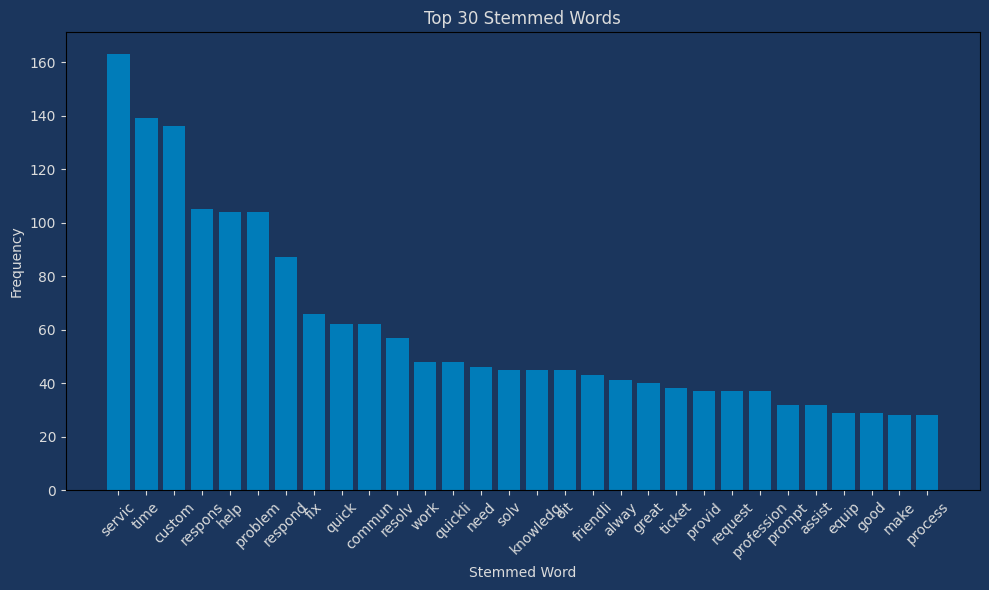

In [ ]:
# Call the plot function to check for the removed stopwords
plot_top_30(promoter_df)

Perfect, those three stopwords have been removed and we can see a few others that are more relevant have moved up the line.

Another approach we can take for analysis and stopword removal is to generate a simple list of these frequencies.  Let's create a function to do just that.

#### Function for List of Stem Frequency

In [ ]:
#function for providing most frequent stemmed words as list
def stem_freq(dataframe):
    # Tokenize words in the 'comments_stemmed' column and create a list of all tokens
    all_tokens = [token for sublist in dataframe['comments_stemmed'] for token in sublist]

    # Calculate frequency distribution for all tokens
    freq_dist = FreqDist(all_tokens)

    #create list of tuples containing frequency and token
    token_freq_list = [(token, freq_dist[token]) for token in freq_dist]

    #Sort the list based on frequency in descending order
    sorted_token_freq_list = sorted(token_freq_list, key=lambda x: x[1], reverse=True)

    #return sorted list
    return sorted_token_freq_list

In [ ]:
stem_freq(promoter_df)

[('servic', 163),
 ('time', 139),
 ('custom', 136),
 ('respons', 105),
 ('help', 104),
 ('problem', 104),
 ('respond', 87),
 ('fix', 66),
 ('quick', 62),
 ('commun', 62),
 ('resolv', 57),
 ('work', 48),
 ('quickli', 48),
 ('need', 46),
 ('solv', 45),
 ('knowledg', 45),
 ('oit', 45),
 ('friendli', 43),
 ('alway', 41),
 ('great', 40),
 ('ticket', 38),
 ('provid', 37),
 ('request', 37),
 ('profession', 37),
 ('prompt', 32),
 ('assist', 32),
 ('equip', 29),
 ('good', 29),
 ('make', 28),
 ('process', 28),
 ('comput', 27),
 ('well', 27),
 ('answer', 25),
 ('patient', 24),
 ('everyth', 24),
 ('softwar', 24),
 ('job', 23),
 ('fast', 22),
 ('sure', 21),
 ('question', 21),
 ('staff', 21),
 ('address', 21),
 ('effici', 20),
 ('thing', 20),
 ('follow', 19),
 ('understand', 18),
 ('team', 18),
 ('excel', 18),
 ('explain', 17),
 ('done', 17),
 ('support', 17),
 ('promptli', 16),
 ('realli', 16),
 ('person', 16),
 ('care', 15),
 ('concern', 15),
 ('troubleshoot', 15),
 ('inform', 13),
 ('courteou', 1

As we can see, we have the same data as the visualization above with the same top stemmed words, but now we have a list and we can view all of the stemmed words in the promoter_df at once, should we so choose.  This is where we will identify the themes comprehensively.  This will likely require manual review for the most accuracy, but once these themes and their corresponding stemmed words are identified, it should take minimal effort for upkeep.  As we will see below, respondents discussing timeliness, for example, are likely to use certain words consistently to convey that idea of timeliness.  In short, the work to categorize these themes and group their stemmed words will be frontloaded- this workload will diminish over time because of the limitations of the English language and the verbal consistency with which respondents will discuss any given topic.

To aid with this process, it may be helpful to export the stem list as an excel document for easier searching. The below code provides this output.

In [ ]:
def stem_list(df, title=None):
    #convert function output to list
    stem_list = stem_freq(df)

    #convert list to DataFrame
    stem_list_df = pd.DataFrame({'Stem Count': stem_list})

    #assign title
    df_name = title.lower()

    #specify excel file path
    excel_file_path = f'{df_name}.xlsx'

    #export DataFrame to Excel
    stem_list_df.to_excel(excel_file_path, index=False)

    print(f"List exported to {excel_file_path}")

stem_list(promoter_df, 'promoter_stem_list')

List exported to promoter_stem_list.xlsx


We want to be able to see the actual comments for any given stemmed word to verify that we are categorizing the stemmed word correctly, to analyze the comments themselves, and to provide quotes for monthly briefings as summative examples.  Let's create a function to do that.

In [ ]:
# Function to get matching rows from list of stemmed words
def get_matching_stem(dataframe, stemmed_words):
    def check_match(comment):
        for word in stemmed_words:
            if isinstance(word, str): #check if single stem
                if word in comment:
                    return True
            elif isinstance(word, tuple): #check if pair of words
                if all(w in comment for w in word):
                    return True
        return False

    filtered_df = dataframe[dataframe['comments_stemmed'].apply(check_match)]

     # Set display option to show full content of columns
    pd.set_option('display.max_colwidth', None)

    result_df = filtered_df.iloc[:, -4:-2]

    return result_df

#Old, single stem function below:
#
# def get_matching_stem(dataframe, stemmed_words):
#     # Filter the DataFrame based on the stemmed words
#     filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: any(word in x for word in stemmed_words))]

#     #Reset index to avoid issues with iloc
#     filtered_df = filtered_df.reset_index(drop=True)

#     # Set display option to show full content of columns
#     pd.set_option('display.max_colwidth', None)

#     # Output the location and comment columns of the matching rows
#     result_df = filtered_df.iloc[:, -4:-2]

#     return result_df

In [ ]:
# Function to get matching rows from list of stemmed words number of words in comments
def get_matching_stem_length(dataframe, stemmed_words, min_length):
    def check_match(comment):
        for word in stemmed_words:
            if isinstance(word, str): #check if single stem
                if word in comment:
                    return True
            elif isinstance(word, tuple): #check if pair of words
                if all(w in comment for w in word):
                    return True
        return False

    filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: check_match(x) and len(x) >= min_length)]

     # Set display option to show full content of columns
    pd.set_option('display.max_colwidth', None)

    result_df = filtered_df.iloc[:, -4:-2]

    return result_df


# #former single-stem function below:
# # Function to get matching rows from list of stemmed words
# def get_matching_stem_length(dataframe, stemmed_words, min_length):
#     # Filter the DataFrame based on the stemmed words
#     filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: any(word in x for word in stemmed_words) and len(x) >= min_length)]

#     #Reset index to avoid issues with iloc
#     filtered_df = filtered_df.reset_index(drop=True)

#     # Set display option to show full content of columns
#     pd.set_option('display.max_colwidth', None)

#     # Output the comment column of the matching rows
#     result_df = filtered_df.iloc[:, -4:-2]

#     return result_df

In [ ]:
def get_matching_all(dataframe, stemmed_words):
    # Filter the DataFrame based on the stemmed words
    filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: all(word in x for word in stemmed_words))]

    #Reset index to avoid issues with iloc
    filtered_df = filtered_df.reset_index(drop=True)

    # Set display option to show full content of columns
    pd.set_option('display.max_colwidth', None)

    # Output the location and comment columns of the matching rows
    result_df = filtered_df.iloc[:, -4:-2]

    return result_df

In [ ]:
#Create function to get matching rows
def get_matching_stem_exclude(dataframe, stemmed_words, exclusion_stems):
    #set exclusion_stems to list of exclusion_stems in called function
    exclusion_stems = exclusion_stems

    # Filter the DataFrame based on the stemmed words
    filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: any(word in x for word in stemmed_words))]

    #Exclude rows based on exclusion_stems
    filtered_df = filtered_df[~filtered_df['comments_stemmed'].apply(lambda x: any(word in x for word in exclusion_stems))]

    #Reset index to avoid issues with iloc
    filtered_df = filtered_df.reset_index(drop=True)

    # Set display option to show full content of columns
    pd.set_option('display.max_colwidth', None)

    # Output the first two columns of the matching rows
    result_df = filtered_df.iloc[:, 1:3]

    return result_df

In [ ]:
def get_excel(output_function, *args, excel_filename=None, **kwargs):
    #Call provided function with given argument
    output_data = output_function(*args, **kwargs)

    #Determine the Excel filename
    if excel_filename is None:
        excel_filename = 'output.xlsx'

    #check if the filename has the .xlsx extension
    if not excel_filename.lower().endswith('.xlsx'):
        excel_filename += '.xlsx'

    #write the dataframe to Excel fil
    output_data.to_excel(excel_filename, index=False, engine='xlsxwriter')
    print(f"Excel file '{excel_filename}' created successfully.")

In [ ]:
def get_excel_length(output_function, *args, excel_filename=None, min_length, **kwargs):
    #Call provided function with given argument
    output_data = output_function(*args, min_length, **kwargs)

    #Determine the Excel filename
    if excel_filename is None:
        excel_filename = 'output.xlsx'

    #check if the filename has the .xlsx extension
    if not excel_filename.lower().endswith('.xlsx'):
        excel_filename += '.xlsx'

    #write the dataframe to Excel fil
    output_data.to_excel(excel_filename, index=False, engine='xlsxwriter')
    print(f"Excel file '{excel_filename}' created successfully.")

In [ ]:
#Extend display to see all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### **Category Comment Analysis**

*   Stemmed word lists for each of the 19 categories
*   The variable names are

```
accountability
career_advancement
communication
idea
employee_engagement
leadership
meaningful_change
ode
performance_management
position_management
process_improvement
recognition
resources
staffing
succession_planning
strategy
technology
telework
positive_comments
```





Accountability

In [ ]:
accountability = ['respons', 'ownership', 'self-account', 'leadership', 'decision-mak', 'integr', 'transpar', 'self-disciplin', 'commit', 'answer', 'perform', 'expect', 'standard', 'evalu', 'feedback', 'consequ', 'improv', 'compli', 'monitor', 'supervis', 'teamwork', 'collabor', 'mutual account', 'peer review', 'support', 'trust', 'commun', 'shared goal', 'cooper']


Career Advancement

In [ ]:
career_advancement = ['advanc', 'promot', 'opportun', 'growth', 'career ladder', 'recognit', 'merit', 'progress', 'rais', 'promotion criteria', 'train', 'cours', 'certif', 'professional develop', 'cross-train', 'workshop', 'skill-build', 'learn', 'educ', 'development program', 'career path', 'development track', 'roadmap', 'progress plan', 'career goal', 'mentor', 'guid', 'career plan', 'succession plan', 'long-term goal']


Communication

In [ ]:
communication = ['open', 'honest', 'clar', 'trust', 'disclos', 'candor', 'integr', 'straightforward', 'account', 'visibil', 'verbal', 'written', 'email', 'meet', 'team', 'chat', 'video call', 'present', 'report', 'announc', 'overcommun', 'undercommun', 'frequenc', 'volum', 'balanc', 'suffici', 'excess', 'inadequ', 'consist', 'information overload']


Inclusion, Diversity, Equity, and Accessibility (IDEA)

In [ ]:
idea = ['divers', 'inclus', 'represent', 'equal opportun', 'diverse workforce', 'recruit', 'hiring practic', 'affirmative action', 'minor', 'underrepresent group', 'discrimin', 'bias', 'prejudic', 'harass', 'inequal', 'unfair treat', 'racism', 'sexism', 'exclus', 'microaggress']


Employee Engagement

In [ ]:
employee_engagement = ['moral', 'engag', 'motiv', 'enthusi', 'job satisfact', 'commit', 'energi', 'positiv', 'disengag', 'burnout', 'leadership', 'support', 'guid', 'feedback', 'recognit', 'encourag', 'influenc', 'relationship', 'trust', 'manag', 'eecc', 'connection call', 'engagement call', 'employee check-in', 'commun', 'interact', 'feedback session', 'engagement meet', 'employee discuss', 'connection session', 'teamwork', 'collabor', 'cooper', 'camaraderi', 'trust', 'relationship-build', 'team bond', 'unit']


Leadership

In [ ]:
leadership = ['feedback', 'input', 'suggest', 'opinion', 'commun', 'ignor', 'overlook', 'unheard', 'dismiss', 'engag', 'ethic', 'integr', 'honest', 'fair', 'transpar', 'account', 'corrupt', 'misconduct', 'unethic', 'trustworthi', 'direct', 'guid', 'strategi', 'vision', 'priorit', 'goal', 'leadership', 'plan', 'discontent', 'misalign', 'servant leadership', 'empat', 'support', 'priorit', 'selfless', 'employee-focus', 'care', 'nurtur', 'empower', 'advocaci', 'trust', 'confid', 'reliabl', 'depend', 'credibil', 'faith', 'assur', 'loyalti', 'respect', 'belief']


Meaningful Change

In [ ]:
meaningful_change = ['repeat', 'unchang', 'stagnant', 'ignor', 'overlook', 'unaddress', 'unresolv', 'inaction', 'frustrat', 'disregard', 'futil', 'pointless', 'hopeless', 'ineffect', 'dishearten', 'discourag', 'unheard', 'neglect', 'waste of time', 'skeptic', 'privaci', 'confidenti', 'anonym', 'secur', 'trust', 'protect', 'sensit inform', 'data breach', 'concern', 'safeguard']


ODE

In [ ]:
ode = ['ode', 'aes', 'ees', 'survey', 'feedback', 'assess', 'evalu', 'metric', 'data collect', 'organizational develop', 'eecc', 'connection call', 'engagement call', '6 essential question', 'performance consultant', 'pc work', 'workshop', 'train session', 'development program', 'employee engag']


Performance Management

In [ ]:
performance_management = ['performance review', 'apprais', 'evalu', 'feedback', 'goal', 'object', 'achiev', 'improv', 'assess', 'develop', 'fair', 'impartial', 'unbias', 'equit', 'just', 'honest', 'transpar', 'object', 'balanc', 'accur']


Position Management

In [ ]:
position_management = ['position descript', 'job role', 'respons', 'duti', 'task', 'accur', 'represent', 'job analys', 'role clar', 'job specific', 'align', 'skillset', 'competenc', 'qualif', 'expertis', 'match', 'fit', 'workforce plan', 'role suit', 'talent manag']


Process Improvement

In [ ]:
process_improvement = ['workflow', 'effici', 'optim', 'streamlin', 'automat', 'tool integr', 'process enhanc', 'improv', 'product', 'simplif']


Recognition

In [ ]:
recognition = ['bonus', 'incent', 'reward', 'performance bonus', 'achiev', 'recognit', 'extra pay', 'financial reward', 'merit pay', 'gratific', 'qsi', 'quality step increas', 'step increas', 'pay rais', 'salary adjust', 'performance-based increas', 'promot', 'increm', 'compens', 'pay scale', 'salary', 'pay', 'compens', 'wage', 'earn', 'competit pay', 'industry standard', 'remuner', 'incom', 'financial compens']


Resources


In [ ]:
resources = ['tool', 'applic', 'softwar', 'equip', 'resourc', 'technolog', 'instrument', 'util', 'devic', 'solut', 'access', 'permiss', 'administr right', 'system access', 'user privileg', 'author', 'secur clear', 'credential', 'access control', 'account manag']


Staffing

In [ ]:
staffing = ['staffing level', 'workforc', 'augment', 'headcount', 'personnel', 'team size', 'recruit', 'hir', 'expans', 'capac', 'workload', 'overburden', 'stress', 'burnout', 'overwork', 'task load', 'operational issu', 'capac', 'product', 'effici', 'hir', 'recruit', 'unethic', 'unfair', 'slow process', 'bias', 'discrimin', 'delay', 'ineffici', 'transpar', 'engag', 'motiv', 'commit', 'enthusi', 'job satisfact', 'involv', 'particip', 'dedic', 'moral', 'product']


Strategy


In [ ]:
strategy = ['reorganiz', 'realign', 'structural chang', 'organizational chang', 'restructur', 'transit', 'adapt', 'uncertain', 'stabil', 'adjust', 'cloud strategi', 'cloud adopt', 'cloud migrat', 'cloud servic', 'cloud comput', 'scalabil', 'flexibil', 'innovat', 'cloud infrastructur', 'cloud solut', 'polici', 'compli', 'regul', 'guidelin', 'standard', 'procedur', 'adher', 'govern', 'protocol', 'rule']


Succession Planning

In [ ]:
succession_planning = ['success', 'successor', 'knowledge transfer', 'mentor', 'train', 'develop', 'continu', 'leadership pipelin', 'skill develop', 'prepar', 'coach', 'transit', 'future leader', 'talent manag', 'knowledge shar']


Technology

In [ ]:
technology = ['vista', 'vmware', 'system', 'softwar', 'applic', 'platform', 'technolog', 'it system', 'infrastructur', 'solut', 'connection issu', 'network problem', 'connect', 'downtim', 'latenc', 'access issu', 'system outag', 'technical difficulti', 'network failur', 'disrupt', 'cerner', 'ehr', 'electronic health record', 'health it', 'medical record', 'patient data', 'health inform', 'digital record', 'health system', 'clinical document', 'microsoft team', 'collabor tool', 'commun platform', 'video conferenc', 'chat', 'virtual meet', 'technical support',

Telework

In [ ]:
telework = ['telework', 'remote work', 'work from home', 'flexibil', 'telecommut', 'virtual work', 'remote opportun', 'wfh', 'home offic', 'flexible schedul', 'remote option']


Positive Comments

In [ ]:
positive_comments = ['appreci', 'satisfact', 'enjoy', 'positive experienc', 'gratitud', 'motiv', 'encourag', 'fulfil', 'pride', 'happi', 'support', 'team spirit', 'collabor', 'innovat', 'achiev', 'recognit', 'growth', 'develop', 'success', 'positive feedback']


Matching Stem Collections:

In [ ]:

get_matching_stem(promoter_df, accountability)

In [ ]:
get_matching_stem(promoter_df, career_advancement)

In [ ]:
get_matching_stem(promoter_df, communication)

In [ ]:
get_matching_stem(promoter_df, idea)

In [ ]:
get_matching_stem(promoter_df, employee_engagement)

In [ ]:
get_matching_stem(promoter_df, idea)

In [ ]:
get_matching_stem(promoter_df, employee_engagement)

In [ ]:
get_matching_stem(promoter_df, leadership)

In [ ]:
get_matching_stem(promoter_df, meaningful_change)

In [ ]:
get_matching_stem(promoter_df, ode)

In [ ]:
get_matching_stem(promoter_df, performance_management)

In [ ]:
get_matching_stem(promoter_df, position_management)

In [ ]:
get_matching_stem(promoter_df, position_management)

In [ ]:
get_matching_stem(promoter_df, process_improvement)

In [ ]:
get_matching_stem(promoter_df, recognition)

In [ ]:
get_matching_stem(promoter_df, resources)

In [ ]:
get_matching_stem(promoter_df, staffing)

In [ ]:
get_matching_stem(promoter_df, succession_planning)

Te#### Customer Service Theme

In [ ]:
#Create list for Customer Service stems
#('stem1', 'stem2') for pairs, otherwise just 'stem'
#To add to this list, follow the same format for stems or pairs of stems.  In order to know what stem format a word will take, look at the stem list
#exports and search using the first few letters of the word you are looking for.

#cust_serv = [('servic', 'custom'), ('servic', 'great'), ('servic', 'poor'), ('servic', 'bad'), ('servic', 'badli'), ('servic', 'excellent'),
#             ('servic', 'receiv'), ('servic', 'reciev'), ('servic', 'good'), ('servic', 'terribl'), ('servic', 'outstand'), ('servic', 'horribl'),
#             ('servic', 'better'), ('servic', 'improv'), ('servic', 'declin'), ('servic', 'provid'),
#             'support', 'nice', 'kind', 'kindli', 'friendli', 'respect', 'helpful', 'understand', 'empathi', 'empathet', ('good', 'listen'), 'helpful',
#             'care', 'profession', 'professionali', 'attent', 'attentit',
#             'rude', 'rudest', 'disrespect', 'arrog', 'irrit', 'burden', 'burdensom', 'yell', 'shout', 'condescend', 'condecend', 'condescens',
#             'swear', 'curs', ('under', 'breath')]

#Previous list in this script below, in case it is helpful
# cust_serv = [('servic', 'custom'), 'custom', 'support', 'nice', 'kind', 'kindli', 'friendli', 'respect', 'helpful', 'understand', 'empathi', 'empathet',
#              'care', 'profession', 'professionali', 'attent', 'attentit', 'happi', 'felt',
#              'rude', 'rudest', 'disrespect', 'arrog', 'irrit', 'burden', 'burdensom', 'condescend', 'condecend', 'condescens', 'stupid',
#              'yell', 'frustrat', 'attitud', 'behavior', 'moral', 'inappropri']

#General Customer Service tags used by CFI:
#The following are all captured in the Python with the stem 'servic'. For the promoter and detractor dfs, 'servic' is enough, but for the other
#dataframes like the passives where we may need to parse out the proporation of positive and negative comments related to customer service, the secondary
#stems attached to 'servic' below may be a helfpul place to start.
#"\"customer service\" OR \"great service\" OR \"poor service\" OR \"bad service\" OR \"excellent service\" OR \"service I received\"
#OR \"service I receive\" OR \"good service\" OR \"terrible service\" OR \"outstanding service\" OR \"horrible service\" OR
#\"better service\" OR \"improve service\" OR \"declined service\" OR \"declining service\" OR \"improved service\" OR \"improving service\"
#OR \"service they provide\" OR \"service they provided\"

#General Customer Service tags used by CFI without the term 'service':
#OR support or rude or nice or kind or disrespect or arrogant or irritated or burden
#or nice or friendly or respect or helpful or understanding or empathetic or \"good listener\" or yell or shout or condescending or swear or
#curse or (under breath)~2 or helpful or caring or \"care about\" or \"cares about\" or professional or professionalism or attentive"


#Pull rows for the cust_serv stem list above, aka "Customer Service" comments
#get_matching_stem(promoter_df, cust_serv)

A quick glance at these show that this method has provided accurate results.  The vast majority of these comments discuss elements of customer service with very few exceptions.

If we need to check other stems, below is the get_matching_stem function

In [ ]:
#call function to pull rows for given stem
get_matching_stem_length(promoter_df, cust_serv, 10)

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, promoter_df, cust_serv, excel_filename='Promoter Customer Service Comments')

Excel file 'Promoter Customer Service Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, promoter_df, cust_serv, min_length=10, excel_filename='Promoter Customer Service Comments 10 Or More Words')

Excel file 'Promoter Customer Service Comments 10 Or More Words.xlsx' created successfully.


A quick glance at these show that this method has provided accurate results.  The vast majority of these comments discuss elements of customer service with very few exceptions.

If we need to check other stems, below is the get_matching_stem function

In [ ]:
#call function to pull rows for given stem
get_matching_stem(promoter_df, ['feel'])

,Location,Promoter Comments
101,TN - Nashville VA Medical Center (626),speak clearly and respectfully. never make me feel like i should be ashamed of getting locked out of the system or forgetting passwords.
544,MT - Fort Harrison VA Medical Center (436),i feel response time is great and many things can be done over the phone instantly. it increases my credibility when i recommend it and it works!
750,NJ - East Orange VA Medical Center (561),"good equipment, quick troubleshooting, never makes me feel dumb"
998,"CA - Los Angeles, Greater Los Angeles Healthcare System (691)","they fix things immediately on the phone if they can. if they can't, i feel like it's not that long a wait before i hear from someone local who gets on my computer and helps me."
1029,IL - Marion VA Medical Center (657A5),"i know almost nothing about computers except how to work the programs when everything is functioning normally. when things go wrong or i am just not doing something correctly, they never make me feel stupid. they have been super in person, teams, or via the phone. i have worked lots of places in my 900 years of nursing and this group at the va are off the charts!!"
1123,"OK - Muskogee, Jack C. Montgomery VA Medical Center (623)","they are friendly, helpful and prompt -- and they don't make you feel stupid while doing it."
1281,ND - Fargo VA Medical Center (437),i feel like they are responsive and address issues quickly which minimizes downtime etc.


Let's check how many respondents there are here.

In [ ]:
#call length of promoter respondents mentioning customer service
len(get_matching_stem(promoter_df, cust_serv))

247

And let's check the total number of promoter respondents.

In [ ]:
len(promoter_df)

805

Now let's calculate the percentage of promoter respondents that mention customer service.

# **Customer Service Promoter Percentage HERE**

In [ ]:
#call length of promoter respondents mentioning customer service and divide by total promoter respondents
(len(get_matching_stem(promoter_df, cust_serv)) / len(promoter_df)) * 100

30.683229813664596

Excellent.  So above is the percentage of promoter respondents who mention Customer service.  This statistic, combined with an example quote from above can be used in the creation of our briefing decks.

Let's make a function for this percentage output, as we will be utilizing this data for the other dataframes too.  

In [ ]:
#Create function for percentage of total respondents who included list of stems
def percentage(df, list):
    print((len(get_matching_stem(df, list)) / len(df)) * 100)

percentage(promoter_df, cust_serv)

#### Timeliness Theme

In [ ]:
#create list of Timeliness stems
#('stem1', 'stem2') for pairs, otherwise just 'stem'
#To add to this list, follow the same format for stems or pairs of stems.  In order to know what stem format a word will take, look at the stem list
#exports and search using the first few letters of the word you are looking for.

#time = [('too', 'long'), ('long', 'resolv'), ('too', 'slow'), ('slow', 'fix'), ('long', 'fix'), ('slow', 'resolv'), 'timeli', ('took', 'forev'),
#       ('wait', 'long'), ('long', 'time'), ('wait', 'time'), ('slow', 'address'), ('hold', 'time'), 'quick', 'quickli', 'quicker', 'immedi',
#        'fast', 'faster', 'shorter', 'shorten', ('take', 'long'), ('taken', 'long'), 'prioriti', 'urgent', 'urgenci', 'haste']


#Timeliness tags used in this script previously:
# time = ['time', 'quick', 'quickli', 'quicker', 'prompt', 'fast', 'faster', 'promptli', 'timeli', 'immedi', 'soon', 'asap', 'expedit',
#         'expediti', 'expedi', 'delay', 'turnaround', 'speed', 'speedi', 'urgent', 'rapid', 'rapidli', 'swift', 'swiftli', 'timefram',
#         'readili', 'effici',
#         'wait', 'slow', 'wast', 'shorter', 'shorten']

#Timeliness tags used by CFI:
#The following are generally negative with few stems related to positive timeliness.  MAny of these will be more useful for the detractor_df.
# "\"too long\" OR \"to long\" OR \"too long to resolve\" OR \"to long to resolve\" OR \"too slow to fix\"
# OR \"to slow to fix\" OR \"too long to fix\" OR \"to long to fix\" OR \"too slow to resolve\" OR \"to slow to resolve\"
# OR \"took too long\" OR \"took to long\" OR \"was not timely\" OR \"is not timely\" OR \"took forever\" OR \"wait a long time\"
# OR \"slow to address\" OR \"wait time\" OR \"hold time\" OR \"not quick\" OR \"should be immediate\" OR \"should be fast\" OR
# \"should be faster\" OR \"shorten\" OR \"shortened\" OR \"should not take so long\" OR \"should not take as long\" OR \"should not be so slow\"
# OR timeliness OR timely OR \"long time\" or wait time or priority or urgency or haste"

#call function to pull rows for Timeliness and Speed
#get_matching_stem(promoter_df, time)

Excellent. Now, we can see how the stemming separated out 'time' from 'timeli', though they really share the same stem.  There are ways to consolidate these stems, but for now we can simply add them to our Timeliness list above, which will become more accurate with the more relevant stemmed words we add.  It will be necessary to systematically scan the stem_freq(promoter_df) output to verify if any other terms may be relevant for these theme of 'timeliness' and other similar themes where multiple stemmed words may be relevant.    

To help with this, we scan stem_freq(promoter_df) output, and then we can use the cell below to preview the rows of specific stemmed words to see if that word is relevant for adding in this theme.  Here is the stem_freq(promoter_df) output again for convenience.

In [ ]:
#call function to pull rows for given stem
get_matching_stem(promoter_df, ['prioriti'])

,Location,Promoter Comments
1253,"OK - Muskogee, Jack C. Montgomery VA Medical Center (623)","staff is very knowledgeable and they have great customer service. when there is a job stop, they make the ticket a priority and it shows in the timeliness of the response."


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, promoter_df, time, excel_filename='Promoter Timeliness Comments')

Excel file 'Promoter Timeliness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, promoter_df, time, min_length=10, excel_filename='Promoter Timeliness Comments 10 Or More Words')

Excel file 'Promoter Timeliness Comments 10 Or More Words.xlsx' created successfully.


# **Timeliness Promoter Percentage HERE**

##### **Timeliness Promoter Percentage**

In [ ]:
#call length of of promoter respondents mentioning Timeliness divided by total respondents
percentage(promoter_df, time)

17.763975155279503


#### Communication and Responsiveness Theme

In [ ]:
#create list of Communication and Responsiveness stems
#('stem1', 'stem2') for pairs, otherwise just 'stem'
#To add to this list, follow the same format for stems or pairs of stems.  In order to know what stem format a word will take, look at the stem list
#exports and search using the first few letters of the word you are looking for.

comm_resp = ['commun', 'followup', 'follow', 'respons', 'respond', 'responc', 'respon', 'process', 'instruct', 'step', 'repli', 'listen', 'convey',
             ('IT', 'lingo'), ('IT', 'jargon'), ('IT', 'languag'), ('IT', 'term'), ('IT', 'terminolog'), ('IT', 'speech'),
             ('tech', 'lingo'), ('tech', 'jargon'), ('tech', 'languag'), ('tech', 'term'), ('tech', 'terminolog'), ('tech', 'speech'),
             ('technician', 'lingo'), ('technician', 'jargon'), ('technician', 'languag'), ('technician', 'term'), ('technician', 'terminolog'),
             ('technician', 'speech'), 'attent', 'hear', 'heard', 'prompt', 'promptli']

# comm_resp = ['commun', 'follow', 'followup', 'instruct', 'step', 'repli,' 'listen', 'convers', 'conver', 'convey', 'languag', 'term',
#              'terminolog', 'speak', 'contact', 'email', 'answer', 'explain', 'explan', 'clear', 'clearli', 'process', 'told', 'tell', 'talk',
#              'address', 'explain', 'ignor', 'interact', 'remark',
#              'respons', 'respond', 'responc', 'respon', 'correspond']

#Communication tags used by CFI:
# Communication or communicate or \"follow up\" or \"follow-up\" or follow or response or respond or process or instructions or
# steps or \"back to you\" or \"respond back\" or \"reply back\" or (follow up response)~5 or \"listen to\" or
# \"listened to\" or understand or convey or ((IT| tech) and (lingo| jargon| language| terms| speech)) or attentive",

#Responsiveness tags used by CFI, two lists, undetermined which one or both used:

#"respond or response or responsive or \"pick up\" or (answer and (phone or call or request or ticket))"

# "\"not responsive\" OR \"very responsive\" OR \"not at all responsive\" OR \"did not hear\" OR \"didn't hear\" OR
# \"delayed response\" OR \"slow response\" OR \"no response\" OR \"slow to respond\" OR response OR \"quick to respond\"
# OR \"good response\" OR \"bad response\" OR \"faster response\" OR \"response time\" OR responsiveness OR responsive OR
# \"rapid response\" OR \"fast to respond\" OR \"timeliness of response\" OR \"ineffective response\" or
# ((fast| quick| speed| short| slow| long| time) and response) or respond or reply or response or
# ((fast| quick| speed| short| slow| long| time) and reply) or ((fast| quick| speed| short| slow| long| time) and respond) or prompt",

#"Understand" is already listed under Customer Service cust_serv list above, so I have not included it here.
#Many of the tags under Responsiveness are more about Timeliness.  Potentially something to consider in the future.


#call function to pull rows for Communication/Responsiveness
get_matching_stem(promoter_df, comm_resp)

In [ ]:
#call function to pull rows for given stem
get_matching_stem(promoter_df, ['explain'])

,Location,Promoter Comments
49,"CO - Aurora, Rocky Mountain Regional VA Medical Center (554)","fix my issues and always respectful of my knowledge of devices, which is minimal. they always explain so i understand!"
97,"FL - Tampa, James A. Haley Veterans' Hospital (673)",explain what problem and solution are
103,"UT - Salt Lake City, George E. Wahlen VA Medical Center (660)","in my experience they try to do everything really well. i have found them timely, willing to explain things and helpful in guiding me through processes."
200,AL - Birmingham VA Medical Center (521),very patient with employees who have problems explaining their issues.
395,,responds quickly and in a friendly manner. explains necessary steps to complete requested process.
783,"MI - Detroit, John D. Dingell VA Medical Center (553)","they are polite, acknowledge the problem, explain the process, and then assist as they can."
785,"GA - Augusta VA Medical Center, Uptown (509A0)",show up and fix things. explain things to you so that you can understand. fix problems expeditiously.
837,"Office of Acquisition, Logistics, and Construction (OALC)",they have been really responsive to resolve my it problems. each time the outcome has been positive with quick response and issues fixed and if not fixed in a short period they explain the issue and why it would take longer than expected.
867,"KY - Lexington VA Medical Center, Troy Bowling Campus (596A4)",customer service - they are really caring about the workers and fix problems promptly and throughly explain
1041,CO - Grand Junction VA Medical Center (575),they are always willing to answer a question or explain anything. they never act like any question is stupid.


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, promoter_df, comm_resp, excel_filename='Promoter Communication Responsiveness Comments')

Excel file 'Promoter Communication Responsiveness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, promoter_df, comm_resp, min_length=10, excel_filename='Promoter Communication Responsiveness Comments 10 Or More Words')

Excel file 'Promoter Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


# **Communication and Responsiveness Promoter Percentage HERE**

##### **Communication and Responsiveness Promoter Percentage**

In [ ]:
#call length of promoter respondents mentioning Communication/Responsivess and divide by total respondents
percentage(promoter_df, comm_resp)

39.62732919254658


Above is the percentage of promoter respondents who mention Communication/Responsiveness.  As I'm looking at the above responses, I also see there is significant overlap between these comments and the Timeliness theme.

Let's take a look to see the specific overlap here.

#### Overlap with Positive Feedback and Accountability

In [ ]:
#join the time and comm_resp lists
time_comm_resp = time + comm_resp

#Run function to pull percentage of respondents
time_comm_percent = (len(get_matching_stem(promoter_df, time_comm_resp)) / len(promoter_df)) * 100

#print percentage
print(time_comm_percent)

46.45962732919255


This is the percentage of respondents who discuss any and all of the stemmed words from both the Timeliness and Communication and Responsiveness themes.

To separate out these two themes from each other, we'll need to use the other function that includes a list of stems to exclude.

In [ ]:
get_matching_stem_exclude(promoter_df, comm_resp, time)

This shows Communication and Responsiveness comments that do not reference the stems used in Timeliness.  We can do the same for the reverse, if we want to, but for now let's move on.  

Now let's check the percentages.

In [ ]:
#assign variable to length of promoter respondents mentioning Responsiveness/Communication only (not Timeliness) divided by total respondents
communication = (len(get_matching_stem_exclude(promoter_df, comm_resp, time)) / len(promoter_df)) * 100
print(communication)

28.695652173913043


This is the percentage of promoter respondents who reference Communication and Responsiveness without referencing Timeliness

In [ ]:
#assign variable to length of promoter respondents mentioning Timeliness only (not Responsiveness/Communication) divided by total respondents
timeliness = (len(get_matching_stem_exclude(promoter_df, time, comm_resp)) / len(promoter_df)) * 100
print(timeliness)

6.832298136645963


This is the perecentage of promoter respondents who reference Timeliness without Communication/Responsiveness

In [ ]:
#subtract sum of communication and timeliness percentages from combined percentage
time_comm_percent - (communication + timeliness)

10.931677018633543

This is the percentage of promoter respondents who reference both Timeliness and Communication/Responsiveness.

Now I'm curious as to the total number of NPS respondents (promoters, detractors, and passives), so let's create a function that will take in dataframes and add their number of responses together.

In [ ]:
#create function to add rows of dataframes together
def get_total_rows(df1, df2, df3):
    total_rows = len(df1) + len(df2) + len(df3)
    return total_rows

#call function on NPS-related comment columns
get_total_rows(promoter_df, passive_df, detractor_df)

1193

In [ ]:
len(promoter_df)

805

Oh, interesting, so out of the total number of NPS respondents in the first output above, the second output is the total number of promoter respondents.

Let's assign that to a variable in case we need it before getting back to our promoter analysis.

In [ ]:
#assign total respondents number to a variable
total_NPS_respondents = get_total_rows(promoter_df, passive_df, detractor_df)

### **Detractor Comment Analysis**

Before we get into the detractor comment analysis, let's remind ourselves of our dataframelist and all of our functions to keep track of them.

First, I'll create one more function to pull up our dataframe list down the line for future analyses.  

In [ ]:
def get_df_list(list):
    for df in list:
        variable_name = [name for name, var in globals().items() if var is df][0]
        print(variable_name)

get_df_list(df_list)

passive_df
euo_promoter_df
euo_detractor_df
yourit_df
yourit_promoter_df
yourit_detractor_df
promoter_df
detractor_df
esd_promoter_df
df


Great, now let's create a list of our functions, in including this latest one.

In [ ]:
function_list = ['plot_top_30(df)', 'stem_freq(df)', 'stem_list(df, title)', 'get_matching_stem(df, list of stems)',
                  'percentage(df, list of stems)', 'get_matching_stem_exclude(df, list of stems to include, list of stems to exclude)',
                  'get_df_list(df_list)']

function_list

['plot_top_30(df)',
 'stem_freq(df)',
 'stem_list(df, title)',
 'get_matching_stem(df, list of stems)',
 'percentage(df, list of stems)',
 'get_matching_stem_exclude(df, list of stems to include, list of stems to exclude)',
 'get_df_list(df_list)']

Let's start with the visualization of the detractors top 30 stems

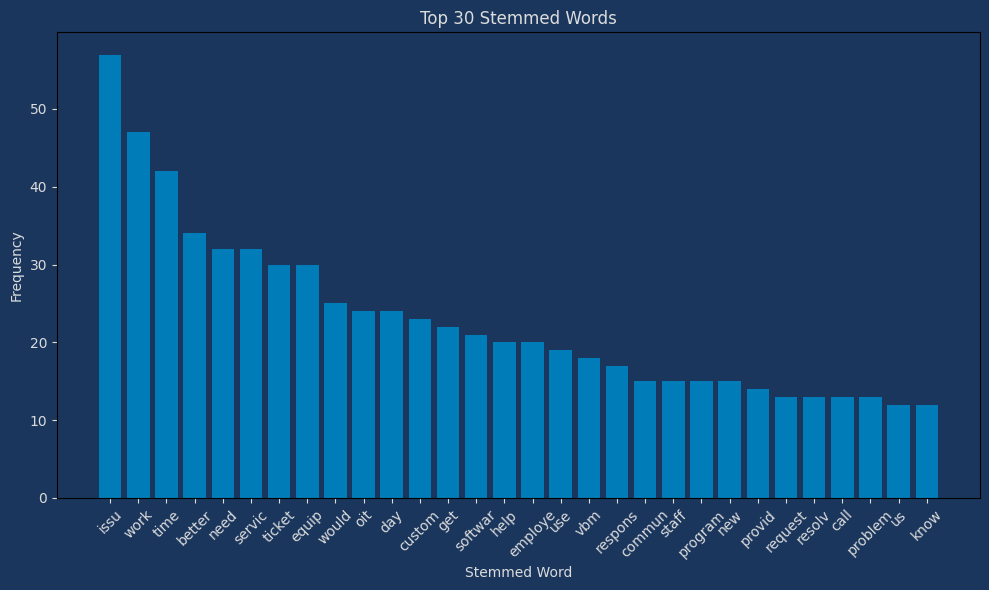

In [ ]:
plot_top_30(detractor_df)

A lot of overlap with the promoter_df, it looks like.  Below is a reminder cell for adding new stopwords and removing them from the results.  But let's move on past that for now and take a look at the list.

In [ ]:
# # Sample new words to add
# new_words = ['issu', 'get', 'manner']  # Add your custom words here

# # Call the previous add_custom_stopwords function to add the new_words above
# add_custom_stopwords(new_words)

# #Apply remove_stopwords function to 'comments_stemmed'
# promoter_df['comments_stemmed'] = promoter_df['comments_stemmed'].apply(remove_stopwords)

Right off the bat, we see the numbers are lower, as there are less detractors than promoters overall.  Let's export this to an excel document as before for easier searching.

In [ ]:
get_matching_stem(detractor_df, ['rude'])

In [ ]:
get_matching_stem_exclude(detractor_df, ['servic'], ['custom'])

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, detractor_df, cust_serv2, excel_filename='Detractor Customer Service Comments')

Excel file 'Detractor Customer Service Comments.xlsx' created successfully.


##### **Customer Service Detractor Percentage**

In [ ]:
percentage(detractor_df, cust_serv2)

23.737373737373737


Above is the percentage of detractor comments that mention Customer Service.

#### Accountability

In [ ]:
#create list of Timeliness stems
# account =

# Accountability


In [ ]:
get_matching_stem(time2)

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, detractor_df, time2, excel_filename='Detractor Timeliness Comments')

Excel file 'Detractor Timeliness Comments.xlsx' created successfully.


#### Communication and Responsiveness Theme

In [ ]:
#create list of Communication and Responsiveness stems
comm_resp2 = comm_resp

# #Communication tags used previously:
# # Communication or communicate or \"follow up\" or \"follow-up\" or follow or response or respond or process or instructions or
# # steps or \"back to you\" or \"respond back\" or \"reply back\" or (follow up response)~5 or \"listen to\" or
# # \"listened to\" or understand or convey or ((IT| tech) and (lingo| jargon| language| terms| speech)) or attentive",

# #Responsiveness tags used previously:
# # "\"not responsive\" OR \"very responsive\" OR \"not at all responsive\" OR \"did not hear\" OR \"didn't hear\" OR
# # \"delayed response\" OR \"slow response\" OR \"no response\" OR \"slow to respond\" OR response OR \"quick to respond\"
# # OR \"good response\" OR \"bad response\" OR \"faster response\" OR \"response time\" OR responsiveness OR responsive OR
# # \"rapid response\" OR \"fast to respond\" OR \"timeliness of response\" OR \"ineffective response\" or
# # ((fast| quick| speed| short| slow| long| time) and response) or respond or reply or response or
# # ((fast| quick| speed| short| slow| long| time) and reply) or ((fast| quick| speed| short| slow| long| time) and respond) or prompt",

# #"Understand" is already listed under Customer Service cust_serv list above.
# #Many of the tags under Responsiveness are more about Timeliness.

comms =

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, detractor_df, comm_resp2, excel_filename='Detractor Communication Responsiveness Comments')

Excel file 'Detractor Communication Responsiveness Comments.xlsx' created successfully.


##### **Communication and Responsivness Detractor Percentage**

In [ ]:
percentage(detractor_df, comm_resp2)

23.737373737373737


Above is the percentage of detractor comments that mention Communication and Responsiveness

### Technology Theme

In [ ]:
#hardware equipment tag list
equip_hard = ['hardwar', 'comput', 'computer', 'devic', 'laptop', 'desktop', 'screen', 'keyboard', 'mous', 'monitor', 'cord', 'cow',
             ('telemetry', 'board'), ('telemetri', 'board'), ('signatur', 'pad'), 'tablet', 'ipad', 'page', 'drive', 'cell', 'cellphone',
              ('phone', 'call'), 'dock', 'mic', 'microphon', 'touchpad', 'trackpad', 'cable', 'cabl', 'fax', 'printer', 'scanner',
              'gfe', 'ram', 'machine', 'machineri', 'machin', 'repair']

# #Hardware tags in this script previously
# equip_hard = ['equip', 'comput', 'computer', 'laptop', 'printer', 'monitor', 'hardwar', 'desktop', 'keyboard', 'mous', 'cow', 'wheel', 'telemetry',
#               'telemetri', 'tablet', 'ipad',  'page', 'signatur', 'devic', 'screen', 'cell', 'gfe', 'drive', 'repair', 'ram', 'driver', 'bcma',
#              'cellphon', 'microphon', 'mic', 'touchpad', 'trackpad', 'cable', 'cabl', 'fax', 'scanner', 'ram', 'machine', 'machineri', 'machin',
#              ]

#Hardware tags provided:
#"hardware or computer or device or laptop or desktop or screen or keyboard or mouse or monitor or cord or COW or COW's
#or \"computer on wheels\" or \"telemetry board\" or \"signature pad\" or tablet or ipad or pager or drive or cellphone
#or (phone && call) or dock or mic or microphone or touchpad or trackpad or cable or fax or printer or scanner or GFE or RAM or machine or repair",

#software equipment tag list
equip_soft = ['softwar', 'program', 'programm', 'app', 'application', 'bdn', 'boss-e', 'boss', 'chi', 'cag', 'ctx', 'citrix', 'ht', 'jvl',
              '0365', 'rescue', 'tic', 'vatas', 'vbms', 'vcl', 'vista', 'v-cprs', 'cprs' 'v-comp', 'comp', 'vpn', 'lynx', 'glitch', 'glitchi', 'lag',
              'crash', 'freez', 'bug', 'boot', 'drop', 'laten', 'leaf', 'snow', 'outdat', 'yourit', 'network', 'internet', 'password', 'portal', 'wifi',
              'http' ]

# #Software tags om this script previously:
# equip_soft = ['softwar', 'program', 'programm', 'app', 'application', 'bdn', 'boss-e', 'boss', 'chi', 'cag', 'ctx', 'citrix', 'ht', 'jvl',
#               '0365', 'rescue', 'tic', 'vatas', 'vbms', 'vcl', 'vista', 'v-cprs', 'cprs' 'v-comp', 'vpn', 'lynx', 'glitch', 'glitchi', 'lag',
#               'crash', 'freez', 'bug', 'boot', 'laten', 'leaf', 'snow', 'dragon', 'capri', 'bcma']

#software tags provided:
#"software  or program or app or application or BDN or BOSS-E or BOSS or CHI or CAG or CTX or Citrix or HT or JVL or O365 or RESCUE
#or TIC or VATAS or VBMS or VCL or VistA or V-CPRS or CPRS or V-COMP or COMP or VPN or lynx or glitch or lag or crash or freeze
#or bug or(black screen)~2 or (blue screen)~2 or (white screen)~2 or boot or drop or laten or LEAF or SNOW”

#consider how to incorporate 'screen', and 'black', 'blue', 'white'. None of these showed up as pairs, and most references to
#screens were about screen-sharing, none about screen crashes.


tech = equip_hard + equip_soft

In [ ]:
get_matching_stem(detractor_df, ['drop'])

,Location,Detractor Comments
304,"TX - Houston, Michael E. DeBakey VA Medical Center (580)","computers on medication carts and desks routinely malfunction by getting stuck on screens and have to be restarted, take a long time to sign you in, card readers stop working, scanners stop working, and sometimes wifi drops off, keyboards stop working. many of the carts for the respiratory department are old and need to be replaced."
1058,CA - Palo Alto VA Medical Center (640),decreasing vpn load times and drop off


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, tech, excel_filename='Technology Customer Service Comments')

Excel file 'Detractor Customer Service Comments.xlsx' created successfully.


In [ ]:
#percentage of technology comments
percentage(tech)

10.1010101010101


#### Overlap with Detractor Communication/Responsiveness and Timeliness Themes

In [ ]:
#join the time and comm_resp lists
time_comm_resp2 = time2 + comm_resp2

#Run function to pull percentage of respondents
time_comm_percent2 = (len(get_matching_stem(detractor_df, time_comm_resp2)) / len(detractor_df)) * 100

#print percentage
print(time_comm_percent2)

30.808080808080806


This is the percentage of respondents who discuss any and all of the stemmed words from both the Timeliness and Communication and Responsiveness themes.

Again, we will divide this out to see more precisely the percentages.

In [ ]:
#assign variable to length of promoter respondents mentioning Responsiveness/Communication only (not Timeliness) divided by total respondents
communication2 = (len(get_matching_stem_exclude(detractor_df, comm_resp2, time2)) / len(detractor_df)) * 100
print(communication2)

18.68686868686869


This is the percentage of detractor respondents who reference Communication and Responsiveness without referencing Timeliness

In [ ]:
#assign variable to length of promoter respondents mentioning Timeliness only (not Responsiveness/Communication) divided by total respondents
timeliness2 = (len(get_matching_stem_exclude(detractor_df, time2, comm_resp2)) / len(detractor_df)) * 100
print(timeliness2)

4.545454545454546


This is the perecentage of detractor respondents who reference Timeliness without Communication/Responsiveness

In [ ]:
#subtract sum of communication and timeliness percentages from combined percentage
time_comm_percent2 - (communication2 + timeliness2)

7.575757575757571

This is the percentage of detractor respondents who reference both Timeliness and Communication/Responsiveness.

### **Passive Comment Analysis**

In [ ]:
get_df_list(df_list)

passive_df
euo_promoter_df
euo_detractor_df
yourit_df
yourit_promoter_df
yourit_detractor_df
promoter_df
detractor_df
esd_promoter_df
df


In [ ]:
function_list

['plot_top_30(df)',
 'stem_freq(df)',
 'stem_list(df, title)',
 'get_matching_stem(df, list of stems)',
 'percentage(df, list of stems)',
 'get_matching_stem_exclude(df, list of stems to include, list of stems to exclude)',
 'get_df_list(df_list)']

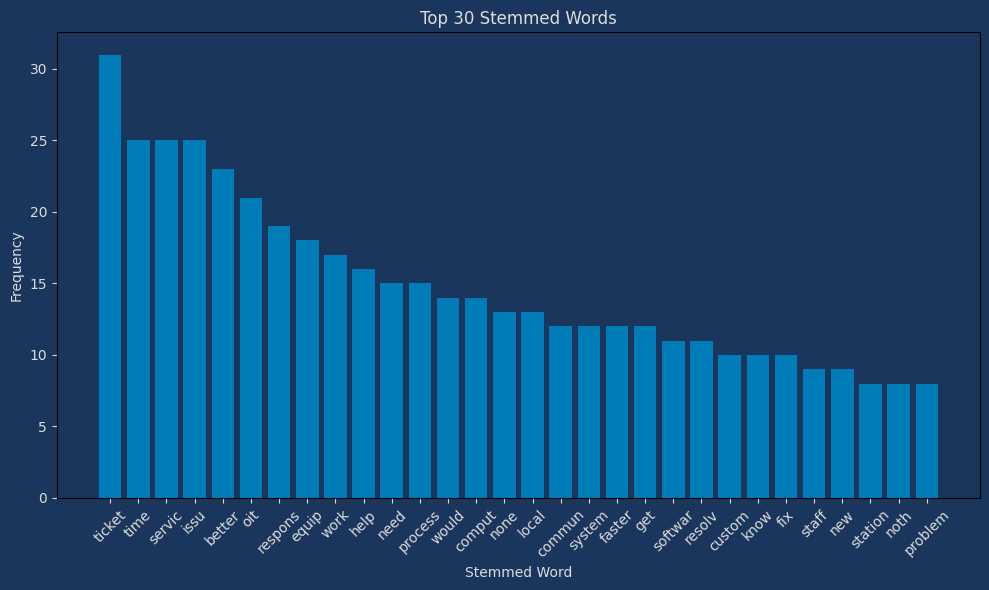

In [ ]:
plot_top_30(passive_df)

Again, a lot of overlap in terms here.  Since the passives will be in between the promoters and the detractors, and since the question for this dataframe is about areas of improvement, it will make sense to reuse the stem lists we created for the Detractor Comment Analysis above.

In [ ]:
stem_freq(passive_df)

[('ticket', 31),
 ('time', 25),
 ('servic', 25),
 ('issu', 25),
 ('better', 23),
 ('oit', 21),
 ('respons', 19),
 ('equip', 18),
 ('work', 17),
 ('help', 16),
 ('need', 15),
 ('process', 15),
 ('would', 14),
 ('comput', 14),
 ('none', 13),
 ('local', 13),
 ('commun', 12),
 ('system', 12),
 ('faster', 12),
 ('get', 12),
 ('softwar', 11),
 ('resolv', 11),
 ('custom', 10),
 ('know', 10),
 ('fix', 10),
 ('staff', 9),
 ('new', 9),
 ('station', 8),
 ('noth', 8),
 ('problem', 8),
 ('call', 8),
 ('contact', 8),
 ('chang', 8),
 ('understand', 7),
 ('quicker', 7),
 ('request', 7),
 ('could', 7),
 ('use', 7),
 ('wait', 7),
 ('thing', 7),
 ('one', 7),
 ('updat', 7),
 ('complet', 7),
 ('day', 7),
 ('improv', 6),
 ('assist', 6),
 ('instead', 6),
 ('due', 6),
 ('depart', 6),
 ('person', 6),
 ('offic', 6),
 ('think', 6),
 ('abl', 6),
 ('way', 6),
 ('see', 6),
 ('mani', 5),
 ('team', 5),
 ('provid', 5),
 ('requir', 5),
 ('avail', 5),
 ('laptop', 5),
 ('facil', 5),
 ('sometim', 5),
 ('tri', 5),
 ('close

In [ ]:
stem_list(passive_df, 'passive_stem_list')

List exported to passive_stem_list.xlsx


#### Customer Service Theme

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, passive_df, cust_serv2, excel_filename='Passive Customer Service Comments')

Excel file 'Passive Customer Service Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, cust_serv2, min_length=10, excel_filename='Passive Customer Service Comments 10 Or More Words')

Excel file 'Passive Customer Service Comments 10 Or More Words.xlsx' created successfully.


# **Customer Service Passive Percentages HERE**

##### **Customer Service Passive Percentage**

In [ ]:
percentage(passive_df, cust_serv2)

15.263157894736842


Above is the percentage of passive comments that mention Customer Service.

#### Timeliness Theme

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, passive_df, time2, excel_filename='Passive Timeliness Comments')

Excel file 'Passive Timeliness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, time2, min_length=10, excel_filename='Passive Timeliness Comments 10 Or More Words')

Excel file 'Passive Timeliness Comments 10 Or More Words.xlsx' created successfully.


# **Timeliness Passive Percentages HERE**

##### **Timeliness Passive Percentage**

In [ ]:
percentage(passive_df, time2)

16.842105263157894


Above is the percentage of passive comments that mention Timeliness.

#### Communication and Responsiveness Theme

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, passive_df, comm_resp2, excel_filename='Passive Communication Responsiveness Comments')

Excel file 'Passive Communication Responsiveness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, comm_resp2, min_length=10, excel_filename='Passive Communication Responsiveness Comments 10 Or More Words')

Excel file 'Passive Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


# **Communication and Responsiveness Passive Percentages HERE**

##### **Communication and Responsivness Passive Percentage**

In [ ]:
percentage(passive_df, comm_resp2)

23.684210526315788


Above is the percentage of passive comments that mention Communication and Responsiveness

#### Equipment Theme

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, passive_df, equip_hard, excel_filename='Passive Hardware Comments')

Excel file 'Passive Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, equip_hard, min_length=10, excel_filename='Passive Hardware Comments 10 Or More Words')

Excel file 'Passive Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, passive_df, equip_soft, excel_filename='Passive Software Comments')

Excel file 'Passive Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, equip_soft, min_length=10, excel_filename='Passive Software Comments 10 Or More Words')

Excel file 'Passive Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, passive_df, cust_serv2, excel_filename='Passive Customer Service Comments')

Excel file 'Passive Customer Service Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, cust_serv2, min_length=10, excel_filename='Passive Customer Service Comments 10 Or More Words')

Excel file 'Passive Customer Service Comments 10 Or More Words.xlsx' created successfully.


##### **Equipment Passive Percentage**

In [ ]:
percentage(passive_df, equip)

17.894736842105264


Above is the percentage of detractor comments that mention Equipment

#### Overlap with Passive Communication/Responsiveness and Timeliness Themes

In [ ]:
#Run function to pull percentage of respondents
time_comm_percent3 = (len(get_matching_stem(passive_df, time_comm_resp2)) / len(passive_df)) * 100

#print percentage
print(time_comm_percent3)

30.526315789473685


This is the percentage of respondents who discuss any and all of the stemmed words from both the Timeliness and Communication and Responsiveness themes.

Again, we will divide this out to see more precisely the percentages.

In [ ]:
#assign variable to length of promoter respondents mentioning Responsiveness/Communication only (not Timeliness) divided by total respondents
communication3 = (len(get_matching_stem_exclude(passive_df, comm_resp2, time2)) / len(passive_df)) * 100
print(communication3)

14.736842105263156


This is the percentage of passive respondents who reference Communication and Responsiveness without referencing Timeliness

In [ ]:
#assign variable to length of promoter respondents mentioning Timeliness only (not Responsiveness/Communication) divided by total respondents
timeliness3 = (len(get_matching_stem_exclude(passive_df, time2, comm_resp2)) / len(passive_df)) * 100
print(timeliness3)

5.263157894736842


This is the perecentage of detractor respondents who reference Timeliness without Communication/Responsiveness

In [ ]:
#subtract sum of communication and timeliness percentages from combined percentage
time_comm_percent3 - (communication3 + timeliness3)

10.526315789473689

This is the percentage of passive respondents who reference both Timeliness and Communication/Responsiveness.

### **ESD Comment Analysis**

#### **Positive Comment Analysis**

In [ ]:
esd_promoter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 51 to 1545
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESD Rating          103 non-null    float64
 1   NPS                 103 non-null    float64
 2   Location            103 non-null    object 
 3   ESD Compliment      103 non-null    object 
 4   comments_tokenized  103 non-null    object 
 5   comments_stemmed    103 non-null    object 
dtypes: float64(2), object(4)
memory usage: 5.6+ KB


In [ ]:
function_list

['plot_top_30(df)',
 'stem_freq(df)',
 'stem_list(df, title)',
 'get_matching_stem(df, list of stems)',
 'percentage(df, list of stems)',
 'get_matching_stem_exclude(df, list of stems to include, list of stems to exclude)',
 'get_df_list(df_list)']

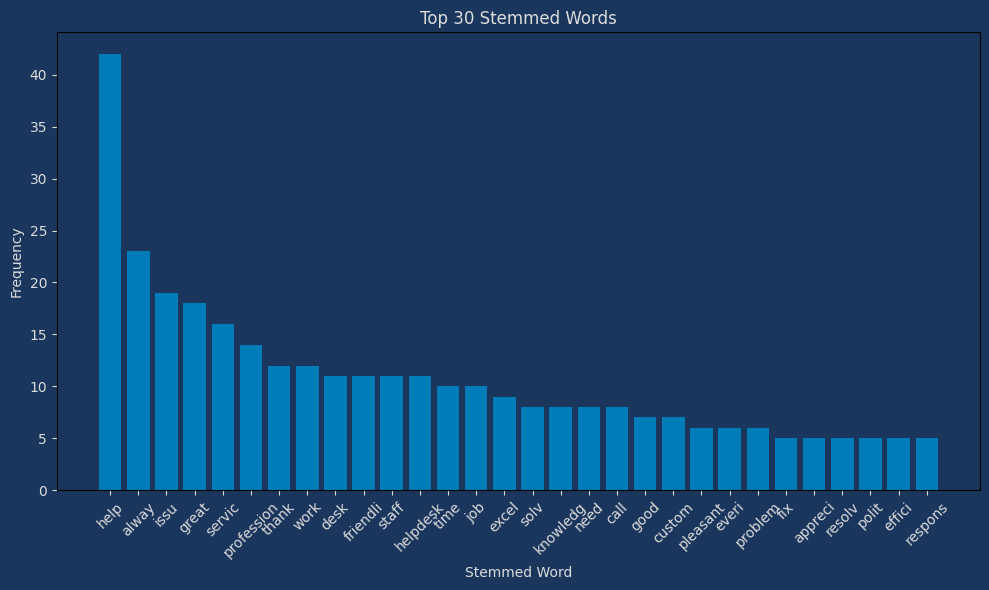

In [ ]:
plot_top_30(esd_promoter_df)

In [ ]:
stem_freq(esd_promoter_df)

[('help', 42),
 ('alway', 23),
 ('issu', 19),
 ('great', 18),
 ('servic', 16),
 ('profession', 14),
 ('thank', 12),
 ('work', 12),
 ('desk', 11),
 ('friendli', 11),
 ('staff', 11),
 ('helpdesk', 11),
 ('time', 10),
 ('job', 10),
 ('excel', 9),
 ('solv', 8),
 ('knowledg', 8),
 ('need', 8),
 ('call', 8),
 ('good', 7),
 ('custom', 7),
 ('pleasant', 6),
 ('everi', 6),
 ('problem', 6),
 ('fix', 5),
 ('appreci', 5),
 ('resolv', 5),
 ('polit', 5),
 ('effici', 5),
 ('respons', 5),
 ('person', 5),
 ('team', 5),
 ('nice', 4),
 ('patienc', 4),
 ('guy', 4),
 ('patient', 4),
 ('know', 4),
 ('enterpris', 4),
 ('quick', 4),
 ('ticket', 4),
 ('make', 4),
 ('address', 4),
 ('process', 4),
 ('peopl', 3),
 ('respect', 3),
 ('amaz', 3),
 ('fast', 3),
 ('much', 3),
 ('talk', 3),
 ('follow', 3),
 ('request', 3),
 ('last', 3),
 ('will', 3),
 ('question', 3),
 ('contact', 3),
 ('local', 3),
 ('like', 3),
 ('comput', 3),
 ('get', 3),
 ('understand', 3),
 ('abl', 3),
 ('keep', 3),
 ('easi', 3),
 ('respond', 2),

On quick glance, I see significant overlap between the top stems here and the top stems in the themes created above.  Let's try to see how these already created themes will apply here.

In [ ]:
stem_list(esd_promoter_df, 'ESD Promoter Stems')

List exported to esd promoter stems.xlsx


In [ ]:
get_matching_stem(esd_promoter_df, comm_resp2)

,Location,ESD Compliment
51,NE - Omaha VA Medical Center (636),you have always responded back quickly and timely. thank you.
60,,prompt service
83,,"i forgot the names of few people that help me, they are so nice and step by step they help me, they have the patience to help me to solve my issues on that time."
165,MD - Baltimore VA Medical Center (512),the it professional is always very helpful and pleasant. there is usually a follow up for ensuring that my concerns./requests are resolved to my satisfaction.
446,DC - Washington VA Medical Center (688),very responsive and efficient
465,"MA - Boston, Jamaica Plain VA Medical Center (523)",the helpdesk is quick to respond and always solves any issue i have from forgotten piv card to software not working and needing routing to local it.
493,SC - Columbia Regional Benefit Office,"i feel like my ticket got lost in the shuffle, i sent two follow on requests and no one reached out until mr. bolden saw it had been pending so long."
516,TN - Nashville Regional Benefit Office,"the tool is just too busy and it is hard to figure out how to just submit a trouble ticket. then the questions that you ask don't make sense to someone who is not a computer person. maybe add a drop down menu that says terms that a non-computer tech would use like: ""i can't open the program."" ""i'm getting a vbms error"", ""i don't know how to troubleshoot this."" ...."
594,"NC - Salisbury, W.G. (Bill) Hefner VA Medical Center (659)","for the most part it addresses issues, problems etc. fairly promptly"
648,OTHER (please specify) Remote,thank you for changing processes to retrieve va member's team meeting recordings.


In [ ]:
get_matching_stem(esd_promoter_df, equip)

,Location,ESD Compliment
155,"KY - Louisville, Robley Rex VA Medical Center (603)",these guys were very professional and got my issue fixed really fast and actually helped us with a printer that wouldnt work that morning as well. thank you all so much
465,"MA - Boston, Jamaica Plain VA Medical Center (523)",the helpdesk is quick to respond and always solves any issue i have from forgotten piv card to software not working and needing routing to local it.
516,TN - Nashville Regional Benefit Office,"the tool is just too busy and it is hard to figure out how to just submit a trouble ticket. then the questions that you ask don't make sense to someone who is not a computer person. maybe add a drop down menu that says terms that a non-computer tech would use like: ""i can't open the program."" ""i'm getting a vbms error"", ""i don't know how to troubleshoot this."" ...."
1149,WI - Tomah VA Medical Center (676),thank you all for making it so easy. i do not feel like a dummy when i call because you guys are always so courteous and professional and speak so reassuringly that it calms down my computer related stress. you guys are great! thanks so much!


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, esd_promoter_df, equip_hard, excel_filename='ESD Promoter Hardware Comments')

Excel file 'ESD Promoter Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_promoter_df, cust_serv2, min_length=10, excel_filename='ESD Promoter Customer Service Comments 10 Or More Words')

Excel file 'ESD Promoter Customer Service Comments 10 Or More Words.xlsx' created successfully.


This is the percentage of ESD detractor respondents who mentioned Customer Service.

In [ ]:
percentage(esd_detractor_df, time2)

6.666666666666667


This is the percentage of ESD detractor respondents who mentioned Timeliness.

In [ ]:
percentage(esd_detractor_df, comm_resp2)

13.333333333333334


This is the percentage of ESD detractor respondents who mentioned Communication/Responsiveness.

In [ ]:
percentage(esd_detractor_df, equip)

6.666666666666667


This is the percentage of ESD detractor respondents who mentioned Equipment.

### **EUO Comment Analysis**

#### **Positive Comment Analysis**

In [ ]:
euo_promoter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 4 to 1545
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EUO Rating          149 non-null    float64
 1   NPS                 149 non-null    float64
 2   Location            149 non-null    object 
 3   EUO Compliment      149 non-null    object 
 4   comments_tokenized  149 non-null    object 
 5   comments_stemmed    149 non-null    object 
dtypes: float64(2), object(4)
memory usage: 8.1+ KB


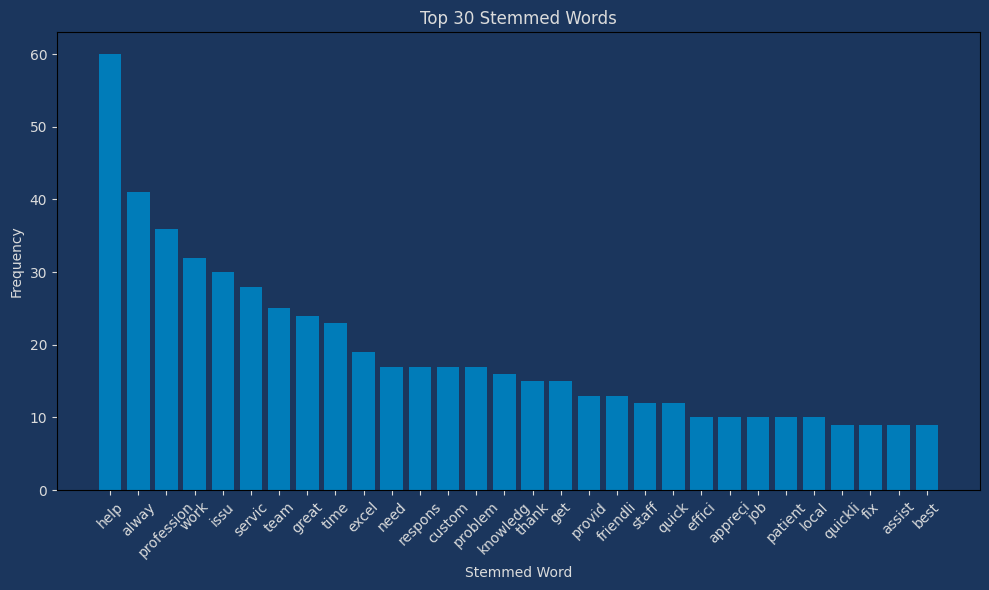

In [ ]:
plot_top_30(euo_promoter_df)

In [ ]:
stem_freq(euo_promoter_df)

[('help', 60),
 ('alway', 41),
 ('profession', 36),
 ('work', 32),
 ('issu', 30),
 ('servic', 28),
 ('team', 25),
 ('great', 24),
 ('time', 23),
 ('excel', 19),
 ('need', 17),
 ('respons', 17),
 ('custom', 17),
 ('problem', 17),
 ('knowledg', 16),
 ('thank', 15),
 ('get', 15),
 ('provid', 13),
 ('friendli', 13),
 ('staff', 12),
 ('quick', 12),
 ('effici', 10),
 ('appreci', 10),
 ('job', 10),
 ('patient', 10),
 ('local', 10),
 ('quickli', 9),
 ('fix', 9),
 ('assist', 9),
 ('best', 9),
 ('resolv', 9),
 ('commun', 8),
 ('well', 8),
 ('oit', 7),
 ('respond', 7),
 ('beyond', 7),
 ('will', 7),
 ('keep', 7),
 ('amaz', 7),
 ('top', 6),
 ('easi', 6),
 ('equip', 6),
 ('va', 6),
 ('realli', 6),
 ('make', 6),
 ('new', 6),
 ('extrem', 6),
 ('solv', 6),
 ('one', 6),
 ('go', 6),
 ('abl', 6),
 ('depart', 5),
 ('laptop', 5),
 ('good', 5),
 ('care', 5),
 ('manner', 5),
 ('ensur', 5),
 ('mr', 5),
 ('person', 5),
 ('goe', 4),
 ('prompt', 4),
 ('robert', 4),
 ('ticket', 4),
 ('question', 4),
 ('process', 4

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, euo_promoter_df, equip_soft, excel_filename='EUO Software Comments')

Excel file 'EUO Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, equip_soft, min_length=10, excel_filename='EUO Promoter Software Comments 10 Or More Words')

Excel file 'EUO Promoter Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, cust_serv2, min_length=10, excel_filename='EUO Promoter Customer Service Comments 10 Or More Words')

Excel file 'EUO Promoter Customer Service Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, time2, min_length=10, excel_filename='EUO Promoter Timeliness Comments 10 Or More Words')

Excel file 'EUO Promoter Timeliness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, comm_resp2, min_length=10, excel_filename='EUO Promoter Communication Responsiveness Comments 10 Or More Words')

Excel file 'EUO Promoter Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
percentage(euo_promoter_df, cust_serv2)

44.966442953020135


This is the percentage of EUO promoter respondents who mentioned Customer Service.

In [ ]:
percentage(euo_promoter_df, time2)

16.10738255033557


This is the percentage of EUO promoter respondents who mentioned Timeliness.

In [ ]:
euo_detractor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 2 to 1420
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EUO Rating          28 non-null     float64
 1   NPS                 28 non-null     float64
 2   Location            28 non-null     object 
 3   EUO Improvement     28 non-null     object 
 4   comments_tokenized  28 non-null     object 
 5   comments_stemmed    28 non-null     object 
dtypes: float64(2), object(4)
memory usage: 1.5+ KB


This is the percentage of yourIT detractor respondents who mentioned Equipment.